In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

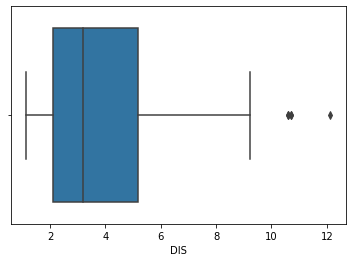

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])

In [ ]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
import numpy as np
# Position of the Outlier
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


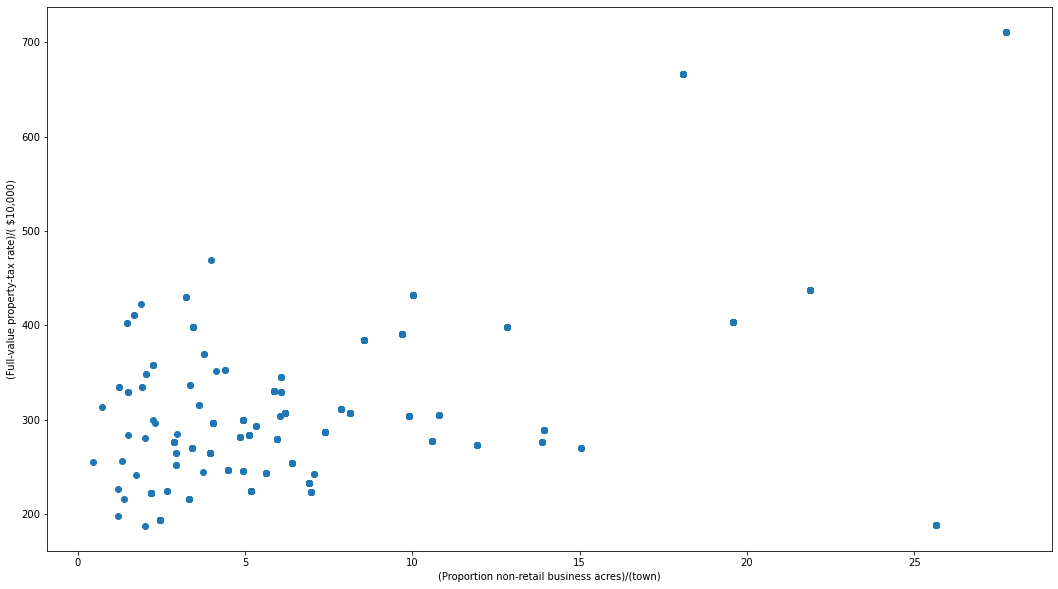

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])

# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')

# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()

In [ ]:
# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492], dtype=int64),)


In [ ]:
# Z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


In [ ]:
threshold = 3

# Position of the outlier
print(np.where(z > 3))

(array([351, 352, 353, 354, 355], dtype=int64),)


In [ ]:
# IQR
# Interpolation - {linear, midpoint, lower, higher, nearest}
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Q1 = ",Q1)
print("Q3 = ",Q3)
print("IQR = ",IQR)

Q1 =  2.1003499999999997
Q3 =  5.16495
IQR =  3.0646000000000004


In [ ]:
# Above Upper bound
# DECISION RANGE
upper = df_boston['DIS'] >= (Q3+1.5*IQR)

print("Upper bound:",upper)
print(np.where(upper))

# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

''' Detection '''
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_boston.shape)

# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)

Old Shape:  (506, 13)
New Shape:  (501, 13)


C:\Users\Surya S\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

C:\Users\Surya S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

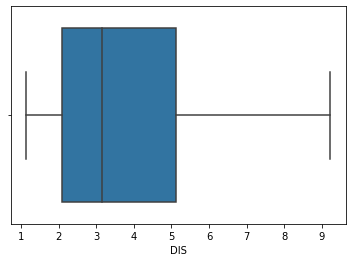

In [ ]:
sns.boxplot(df_boston['DIS'])